<a href="https://colab.research.google.com/github/romeshb/Flight_Fare_Prediction_Website/blob/main/Flight_Price_Prediction_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data = pd.read_excel(r"/content/drive/MyDrive/Colab Notebooks/dataset flight fare prediction/Data_Train.xlsx",)

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
train_data.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
4h 10m       1
33h 45m      1
13h 35m      1
19h 50m      1
30h 15m      1
Name: Duration, Length: 368, dtype: int64

In [ ]:
train_data.shape

(10683, 11)

In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.shape

(10682, 11)

In [ ]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

In [ ]:
train_data['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [ ]:
train_data['Journey_Month'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [ ]:
train_data['Journey_Day'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.day

In [ ]:
#train_data['Weekday_of_Journey'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.dayofweek #day_name()

In [ ]:
train_data['Weekday_name_of_Journey'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.day_name()

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Weekday_name_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,Sunday
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,Wednesday
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,Sunday
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,Sunday
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,Friday


In [ ]:
train_data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [ ]:
# Extracting hours
train_data['Dep_hour'] = pd.to_datetime(train_data.Dep_Time).dt.hour

# Extracting minutes
train_data['Dep_minutes'] = pd.to_datetime(train_data.Dep_Time).dt.minute

# Dropping Dep time column
train_data.drop(['Dep_Time'], axis=1, inplace=True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Weekday_name_of_Journey,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,Sunday,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,Wednesday,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,Sunday,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,Sunday,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,Friday,16,50


In [ ]:
# Extracting hours
train_data['Arrival_hour'] = pd.to_datetime(train_data.Arrival_Time	).dt.hour

# Extracting minutes
train_data['Arrival_minutes'] = pd.to_datetime(train_data.Arrival_Time	).dt.minute

# Dropping Arrival time column
train_data.drop(['Arrival_Time'], axis=1, inplace=True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Weekday_name_of_Journey,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,Sunday,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,Wednesday,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,Sunday,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,Sunday,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,Friday,16,50,21,35


In [ ]:
# duration = list(train_data.Duration)

# for i in range(len(duration)):
#     if len(duration[i].split()) != 2:         # check if duration contains only hours or min
#         if 'h' in duration[i]:
#             duration[i] = duration[i].strip() + '0m'           # Adds 0 minutes
#         else:
#             duration[i] = '0h' + duration[i]                   # Adds 0 hours

# duration_hours = []
# duration_mins = []
# for i in range(len(duration)):
#     duration_hours.append(int(duration[i].split(sep='h')[0]))
#     try:
#         duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))
#     except ValueError:
#         duration_mins.append(int(0))

In [ ]:
# train_data['Duration_hours'] = duration_hours
# train_data['Duration_mins'] = duration_mins

In [ ]:
def duration_to_mins(string_element):
    """ Here we extract Hours and minutes from string of pattern '2h 50m'and convert to minutes (int object type).
    """
    dur_mins = 0 # initiate duration in mins as zero
    for substring in string_element.split() : # Here we split string at spaces anditerate over each element of the list
        if 'h' in substring:
            h = int(substring[:-1]) * 60 # We convert hours to mins by multiplying with 60.
            dur_mins += h # addtion of mins to duration
        if 'm' in substring:
             m = int(substring[:-1]) # we extract mins from the string
             dur_mins += m # addtion of mins to duration
    return dur_mins

In [ ]:
train_data["Duration_in_mins"] = train_data.Duration.apply(duration_to_mins) # doing element wise operation on the whole column.
train_data["Duration_in_mins"]

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_in_mins, Length: 10682, dtype: int64

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Weekday_name_of_Journey,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,Sunday,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,Wednesday,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,Sunday,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,Sunday,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,Friday,16,50,21,35,285


In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Weekday_name_of_Journey,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,Sunday,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,Wednesday,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,Sunday,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,Sunday,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,Friday,16,50,21,35,285


In [ ]:
train_data.drop(['Duration'], axis=1, inplace=True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Weekday_name_of_Journey,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,Sunday,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,Wednesday,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,Sunday,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,Sunday,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,Friday,16,50,21,35,285


# Handling categotical data

In [ ]:
train_data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

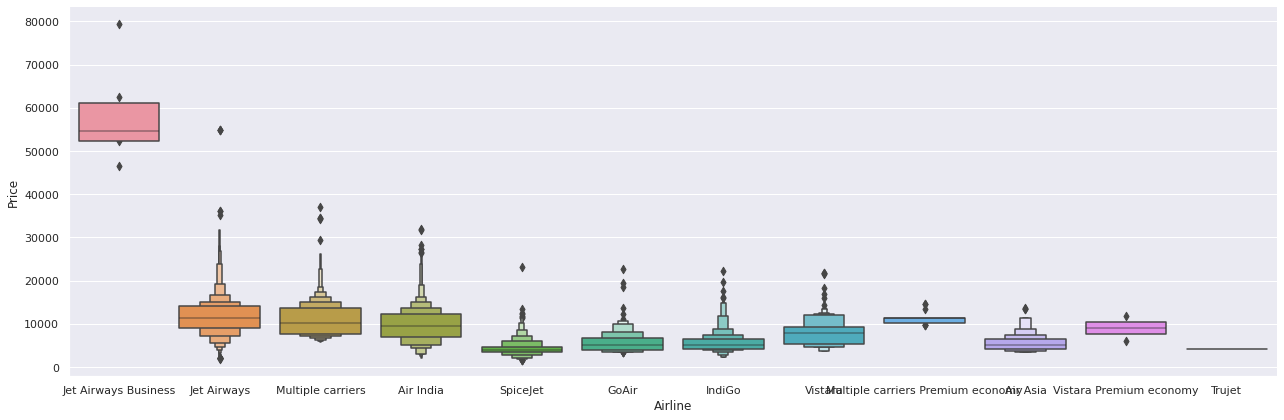

In [ ]:
# Airline vs Price

sns.catplot(y= 'Price', x= 'Airline', data= train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [ ]:
Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
train_data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

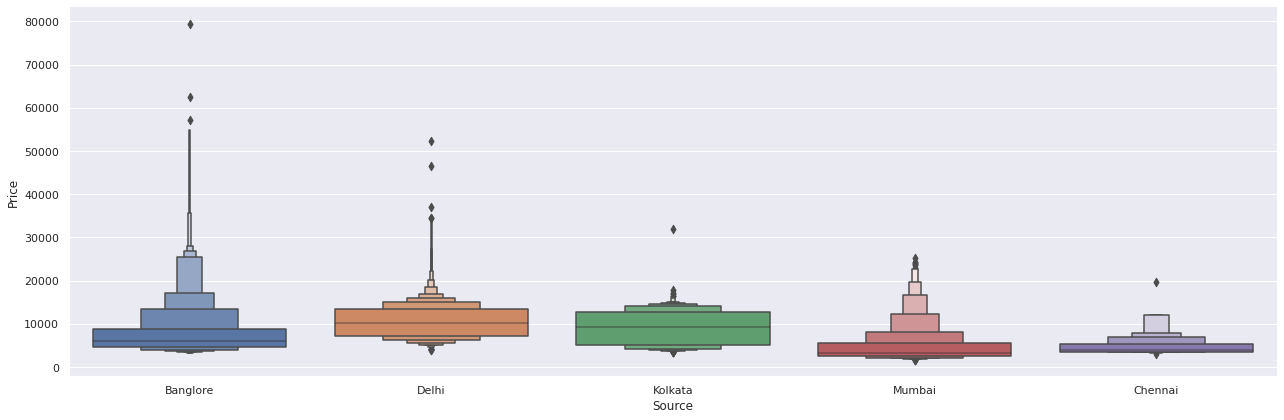

In [ ]:
# Source vs Price

sns.catplot(y= 'Price', x= 'Source', data= train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [ ]:
Source = train_data[['Source']]
Source = pd.get_dummies(Source) #without dropping the first column
Source.head()

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [ ]:
train_data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination) #without dropping the first 
Destination.head()

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [ ]:
train_data.Route

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [ ]:
train_data.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [ ]:
train_data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
train_data.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_Day,Weekday_name_of_Journey,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_in_mins
0,IndiGo,Banglore,New Delhi,0,3897,3,24,Sunday,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,5,1,Wednesday,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,6,9,Sunday,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,5,12,Sunday,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,3,1,Friday,16,50,21,35,285


In [ ]:
weekday = train_data[['Weekday_name_of_Journey']]
weekday = pd.get_dummies(weekday) #without dropping the first
weekday.head()

,Weekday_name_of_Journey_Friday,Weekday_name_of_Journey_Monday,Weekday_name_of_Journey_Saturday,Weekday_name_of_Journey_Sunday,Weekday_name_of_Journey_Thursday,Weekday_name_of_Journey_Tuesday,Weekday_name_of_Journey_Wednesday
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0


In [ ]:
# DataFrame Concatenation

train_data = pd.concat([train_data, Airline, Source, Destination,weekday], axis=1)

In [ ]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_Day,Weekday_name_of_Journey,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_in_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Weekday_name_of_Journey_Friday,Weekday_name_of_Journey_Monday,Weekday_name_of_Journey_Saturday,Weekday_name_of_Journey_Sunday,Weekday_name_of_Journey_Thursday,Weekday_name_of_Journey_Tuesday,Weekday_name_of_Journey_Wednesday
0,IndiGo,Banglore,New Delhi,0,3897,3,24,Sunday,22,20,1,10,170,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,Air India,Kolkata,Banglore,2,7662,5,1,Wednesday,5,50,13,15,445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,Jet Airways,Delhi,Cochin,2,13882,6,9,Sunday,9,25,4,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,Sunday,18,5,23,30,325,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,Friday,16,50,21,35,285,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
train_data.drop(['Airline', 'Source', 'Destination','Weekday_name_of_Journey'], axis=1, inplace=True)

In [ ]:
train_data.shape

(10682, 38)

# Test Data

In [ ]:
test_data = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/dataset flight fare prediction/Test_set.xlsx')

In [ ]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
# Preprocessing

print('Test data info')
print('#'*50)
print(test_data.info())

print('NULL values :')
print('#'*50)
test_data.dropna(inplace=True)
print(test_data.isnull().sum())

# EDA

test_data['Journey_Day'] = pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
test_data['Journey_Month'] = pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.month
test_data['Weekday_name_of_Journey'] = pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.day_name()

test_data.drop(['Date_of_Journey'], axis=1, inplace=True)

# Extracting hours
test_data['Arrival_hour'] = pd.to_datetime(test_data.Arrival_Time).dt.hour

# Extracting minutes
test_data['Arrival_minutes'] = pd.to_datetime(test_data.Arrival_Time).dt.minute

# Dropping Arrival time column
test_data.drop(['Arrival_Time'], axis=1, inplace=True)

# duration = list(test_data.Duration)

# for i in range(len(duration)):
#     if len(duration[i].split()) != 2:         # check if duration contains only hours or min
#         if 'h' in duration[i]:
#             duration[i] = duration[i].strip() + '0m'           # Adds 0 minutes
#         else:
#             duration[i] = '0h' + duration[i]                   # Adds 0 hours

# duration_hours = []
# duration_mins = []
# for i in range(len(duration)):
#     duration_hours.append(int(duration[i].split(sep='h')[0]))
#     try:
#         duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))
#     except ValueError:
#         duration_mins.append(int(0))


# test_data['Duration_hours'] = duration_hours
# test_data['Duration_mins'] = duration_mins
test_data["Duration_in_mins"] = test_data.Duration.apply(duration_to_mins) # doing element wise operation on the whole column.

test_data.drop(['Duration'], axis=1, inplace=True)


# Handling categotical data

Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)

Source = test_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)

Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)

weekday = test_data[['Weekday_name_of_Journey']]
weekday = pd.get_dummies(weekday,drop_first=True)

test_data.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

test_data.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)

test_data = pd.concat([test_data, Airline, Source, Destination,weekday], axis=1)

test_data.drop(['Airline', 'Source', 'Destination','Weekday_name_of_Journey'], axis=1, inplace=True)

print(test_data.shape)

Test data info
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
NULL values :
##################################################
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_

In [ ]:
# Extracting hours
test_data['Dep_hour'] = pd.to_datetime(test_data.Dep_Time).dt.hour

# Extracting minutes
test_data['Dep_minutes'] = pd.to_datetime(test_data.Dep_Time).dt.minute

# Dropping Dep time column
test_data.drop(['Dep_Time'], axis=1, inplace=True)

In [ ]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Feature Selection

In [ ]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_Month', 'Journey_Day', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'Duration_in_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Weekday_name_of_Journey_Friday',
       'Weekday_name_of_Journey_Monday', 'Weekday_name_of_Journey_Saturday',
       'Weekday_name_of_Journey_Sunday', 'Weekday_name_of_Journey_Thursday',
       'Weekday_name_of_Journey_Tuesday', 'Weekday_name_of_Journey_Wednesday'],
      dtype=

In [ ]:
X = train_data.loc[:, ['Total_Stops', 'Journey_Month', 'Journey_Day', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'Duration_in_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Weekday_name_of_Journey_Friday',
       'Weekday_name_of_Journey_Monday', 'Weekday_name_of_Journey_Saturday',
       'Weekday_name_of_Journey_Sunday', 'Weekday_name_of_Journey_Thursday',
       'Weekday_name_of_Journey_Tuesday', 'Weekday_name_of_Journey_Wednesday']]

In [ ]:
X.head()

,Total_Stops,Journey_Month,Journey_Day,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_in_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Weekday_name_of_Journey_Friday,Weekday_name_of_Journey_Monday,Weekday_name_of_Journey_Saturday,Weekday_name_of_Journey_Sunday,Weekday_name_of_Journey_Thursday,Weekday_name_of_Journey_Tuesday,Weekday_name_of_Journey_Wednesday
0,0,3,24,22,20,1,10,170,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,2,5,1,5,50,13,15,445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,2,6,9,9,25,4,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1,5,12,18,5,23,30,325,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,1,3,1,16,50,21,35,285,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
y = train_data.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

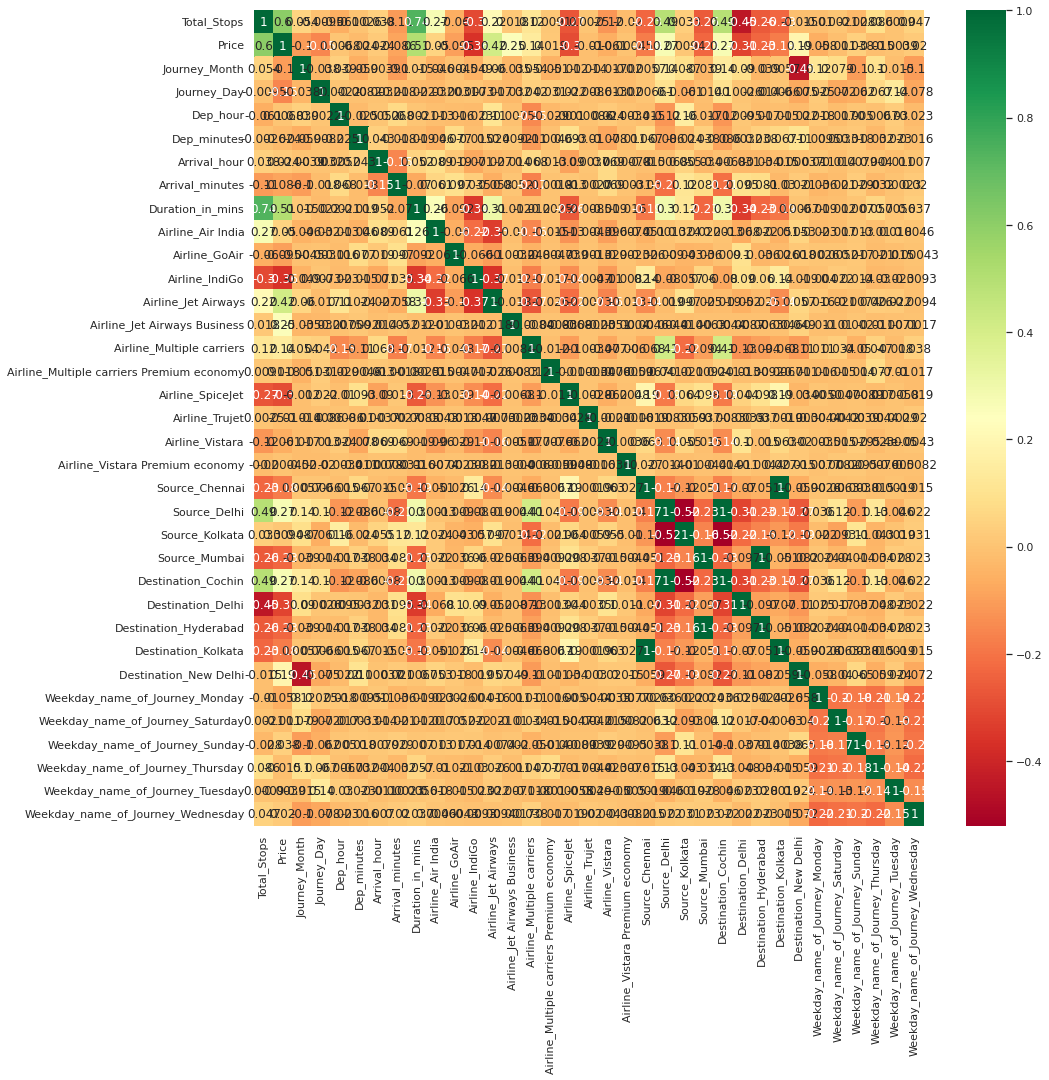

In [ ]:
# Heatmap

plt.figure(figsize=(15, 15))
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn')

plt.show()

In [ ]:
# important feature using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [ ]:
print(selection.feature_importances_)

[2.22982694e-01 5.11097793e-02 8.78168055e-02 2.73061127e-02
 2.51232490e-02 3.11232623e-02 2.24115692e-02 1.17620737e-01
 1.08929970e-02 1.90234371e-03 1.80904777e-02 1.42309161e-01
 6.74497183e-02 1.94614016e-02 9.18799151e-04 2.79581315e-03
 1.02708064e-04 5.11843337e-03 7.49485930e-05 5.50528138e-03
 3.40132307e-04 1.11983181e-02 3.42116931e-03 9.90450013e-03
 3.65769021e-03 1.29767981e-02 1.68202121e-02 7.03003665e-03
 4.45089010e-04 1.43200289e-02 2.87896277e-02 5.58074233e-03
 3.41965061e-03 6.17387197e-03 5.20854527e-03 2.66827644e-03
 7.92901901e-03]


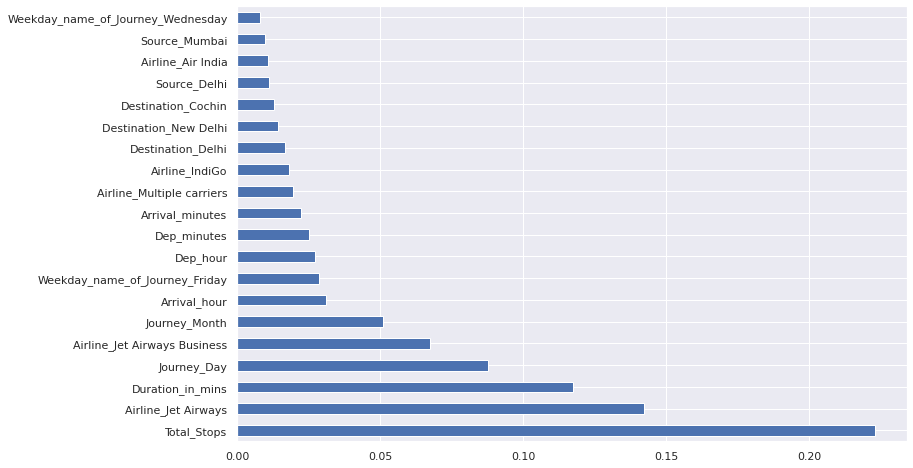

In [ ]:
plt.figure(figsize=(12, 8))
feat = pd.Series(selection.feature_importances_, index=X.columns)
feat.nlargest(20).plot(kind= 'barh')
plt.show()

# Building Model using Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=15, n_estimators=700)

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train, y_train)

0.9013591862481869

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


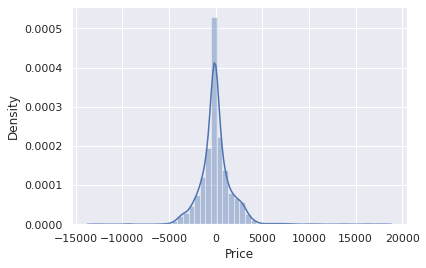

In [ ]:
sns.distplot(y_test-y_pred)
plt.show()

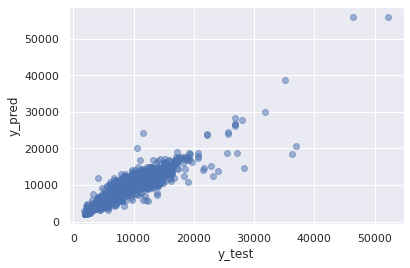

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1121.9430577688954
MSE: 3074748.6165692154
RMSE: 1753.4961125047341


In [ ]:
print('R2:', metrics.r2_score(y_test, y_pred))

R2: 0.8508989744336373


In [ ]:
# HyperParameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in RF
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to consider
max_features = ['auto', 'sqrt']
# Max level in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
# Min sample split
min_samples_split = [2, 5, 10, 15, 100]
# Min sample in leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=20,
                                                   min_samples_split=15,
                                                   n_estimators=700),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
    

In [ ]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [ ]:
prediction = rf_random.predict(X_test)

<Figure size 576x576 with 0 Axes>

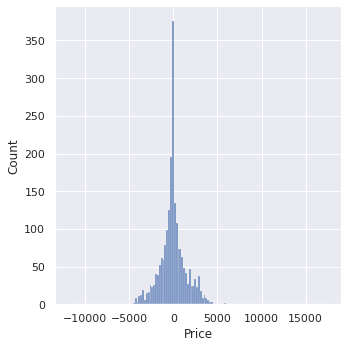

In [ ]:
plt.figure(figsize=(8, 8))
sns.displot(y_test-prediction)
plt.show()

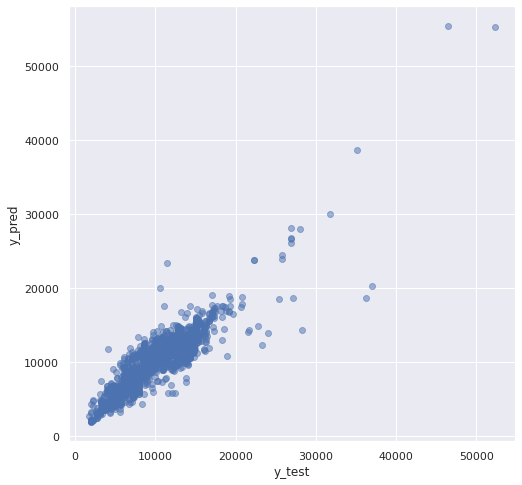

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, prediction, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R2:', metrics.r2_score(y_test, prediction))

MAE: 1119.349597546564
MSE: 3073391.2903572186
RMSE: 1753.1090355015624
R2: 0.8509647940356516


# Saving model for later use

In [ ]:
import pickle

file = open('flightModel.pkl', 'wb')

pickle.dump(rf_random, file)

In [ ]:
model = open('flightModel.pkl', 'rb')
forest = pickle.load(model)